# Gojek Day 2 Session 4 Part 2 Other Classification Metrics and Cross Validation

In session 2, we have used accuracy as our main metrics for classification. However, there are actually others that might be better suited, depends on the problem and application

Let's recap from beginning, load the dataset, train one naive classifier without tuning and preprocessing and calculate the accuracy score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('medium_dataset.csv')
df.head()

,x,y,label
0,0.471969,0.290023,0
1,-0.647295,-0.637178,0
2,-0.551973,-1.019000,0
3,-0.150224,0.636008,0
4,-0.335839,0.642716,0


In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X = df[['x', 'y']]
y = df['label']
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
from sklearn.metrics import accuracy_score

prediction = logreg.predict(df[['x', 'y']])
accuracy_score(df['label'], prediction)

0.67000000000000004

## Confusion Matrix
Many other subsequent metrics can be derived from this so-called confusion matrix, where it shows all the counting between combination of prediction and actual label

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
mat = confusion_matrix(df['label'], prediction)

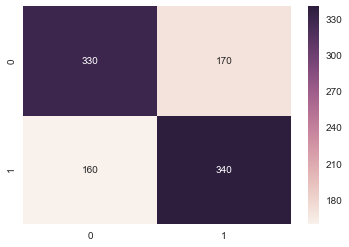

In [7]:
sns.heatmap(mat, annot=True, fmt='d')

where accuracy just means the sum of diagonal cell in the confusion matrix, divided by the total number is all cell

## Precision

Precision is defined by how many positive prediction prediction is really positive

In [8]:
from sklearn.metrics import precision_score

precision_score(y, prediction)

0.66666666666666663

## Recall
Recall is defined by how many positive class included in positive prediction

In [9]:
from sklearn.metrics import recall_score

recall_score(y, prediction)

0.68000000000000005

## F1 score
F1 score is one way to combine precision and recall into single value, for easier comparison, in model selection, for example

In [10]:
from sklearn.metrics import f1_score

f1_score(y, prediction)

0.67326732673267331

## ROC curve and AUC score
Gives you the performance when the threshold is varied

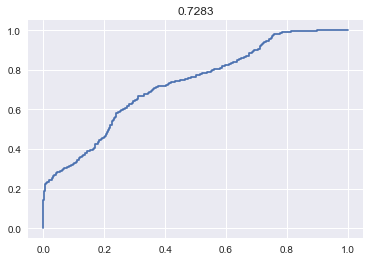

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

scores = logreg.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

plt.plot(fpr, tpr)
plt.title(roc_auc_score(y, scores))

## PR curve and AP score
AUC score is good, but only if the data is balanced. If imbalanced, average precision and PR curve gives more accurate assessment

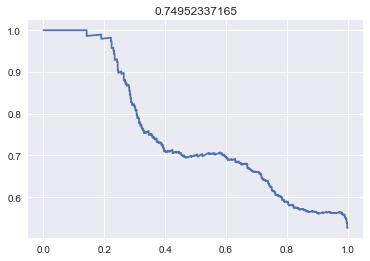

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score

scores = logreg.predict_proba(X)[:, 1]
precision, recall, _ = precision_recall_curve(y, scores, pos_label=1)

plt.plot(recall, precision)
plt.title(average_precision_score(y, scores))

There are also other metrics that is used is specific domain, such as NDCG that is in ranking and retrieval problem

# Cross validation

If you are in the model selection, if you test multiple hyperparam into the test dataset, you are subconsciously overfitting to the test dataset, and the generalization will not be good. That's why, if you have enough data, you usually split the dataset into 3, training, validation, and testing.

However, when data is scarce, we have to make do.

The extreme version of k-fold cross validation where k is the number of training data is called leave-one-out cross validation

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='accuracy')

array([ 0.715,  0.695,  0.695,  0.595,  0.655])

# Exercise
- Calculate all the above (or some, whatever time permits) using cross validation on hard dataset!!
- implement cross validation from scratch manually